# **Final Data Preprocessing, Feature Engineering, and Dimensionality Reduction for Rent Price Prediction**
This notebook focuses on preparing a property dataset for machine learning model training by performing extensive data preprocessing, feature engineering, and dimensionality reduction. The objective is to predict rent prices based on various property attributes, spatial data, and sentiment analysis. Key steps include handling missing data, normalizing features, transforming skewed distributions, and reducing the dataset’s dimensionality through Principal Component Analysis (PCA). The notebook is structured as follows:

Table Of Contents

1. Data Loading & Exploration:
    * Load the unprocessed dataset and perform basic statistical analysis.
    * Visualize feature distributions and relationships between key variables.

2. Feature Engineering:

    * Create new features such as squared internal area, log-transformed features, and apply Box-Cox transformations to handle non-normal distributions.
    * Introduce interaction terms and feature transformations to enhance model predictive power.

3. Handling Missing Data:
    *Use KNN imputation to fill missing values in important features like Bond.

4. Categorical Encoding:
    * Apply One-Hot Encoding to categorical features such as property type, suburb, and dominant topic label.

5. Normalisation:
    * Standardize numerical features to ensure consistent feature scaling, essential for machine learning algorithms.

6. Mutual Information Feature Selection:
    * Compute mutual information scores for each feature and select the top features based on their predictive power.

7. Dimensionality Reduction with PCA:
    * Apply PCA to reduce the dimensionality of the dataset while retaining 95% of the variance.
    * Select the most important components for further modeling.



In [49]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

In [50]:
unprocessed = pd.read_csv("../data/curated/input.csv")
unprocessed.describe()

/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

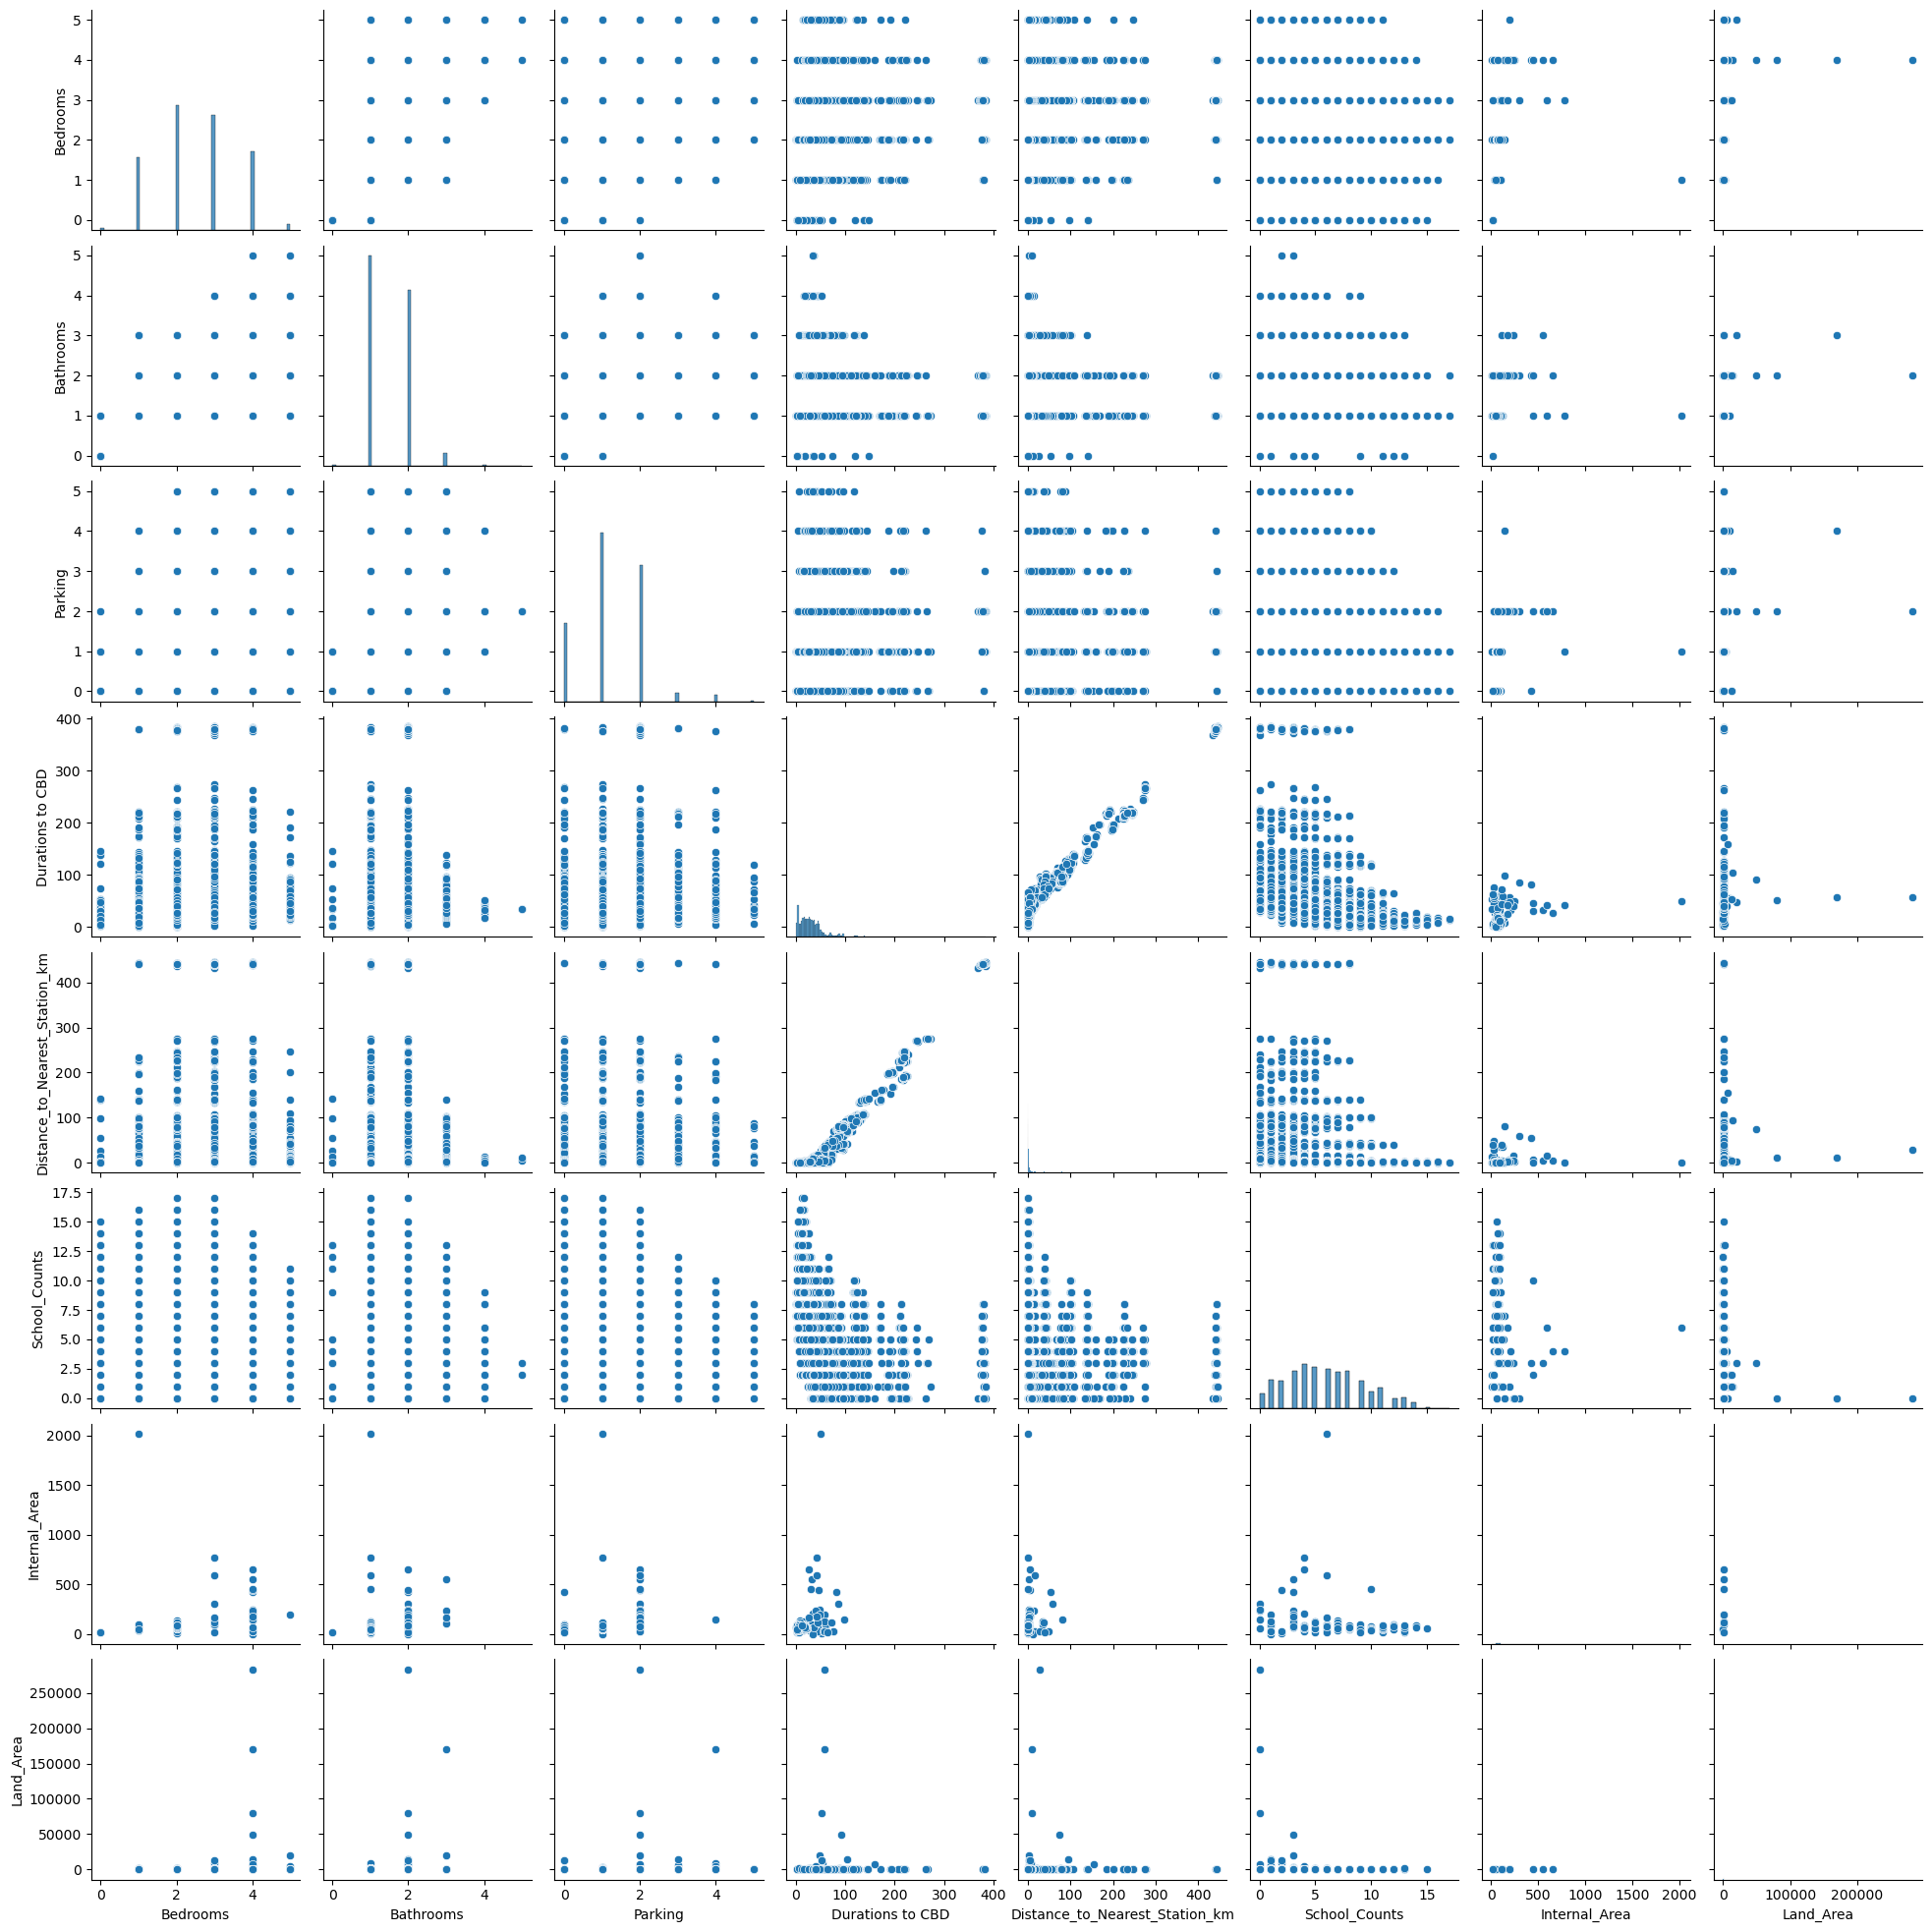

In [53]:
sns.pairplot(unprocessed[['Bedrooms', 'Bathrooms', 'Parking', 'Durations to CBD','Distance_to_Nearest_Station_km', 'School_Counts', 'Internal_Area', 'Land_Area']])
plt.show()


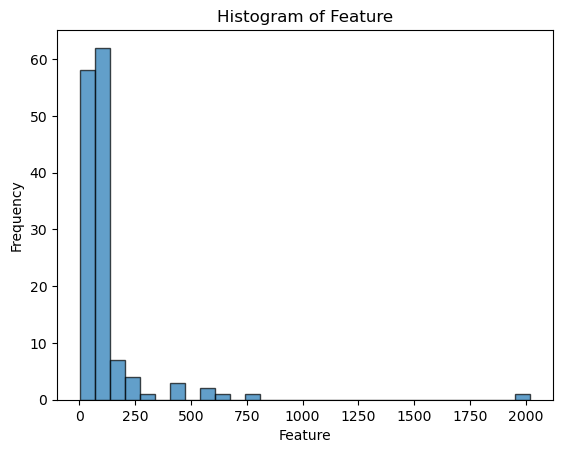

In [54]:
plt.hist(unprocessed['Internal_Area'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

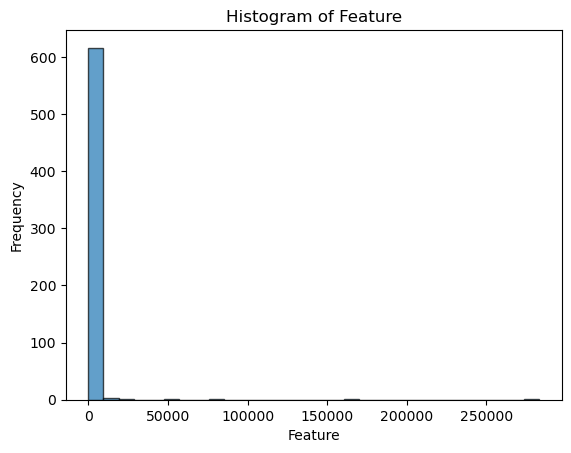

In [55]:
plt.hist(unprocessed['Land_Area'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

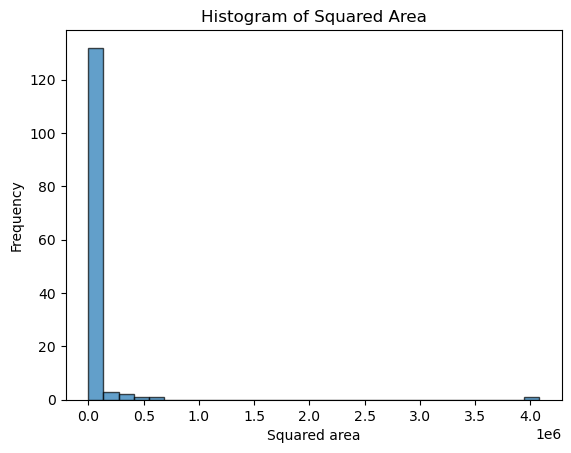

In [56]:
unprocessed['IntArea_squared'] = np.square(unprocessed['Internal_Area'])

plt.hist(unprocessed['IntArea_squared'], bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Squared area')
plt.ylabel('Frequency')
plt.title('Histogram of Squared Area')
plt.show()

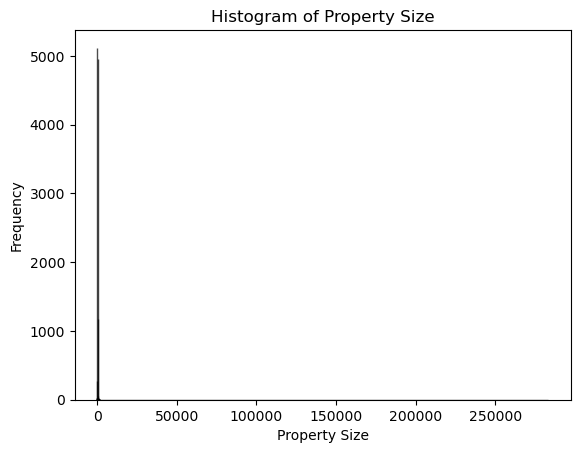

In [57]:
plt.hist(unprocessed['Property_Size'], bins="auto", edgecolor='k', alpha=0.7)
plt.xlabel('Property Size')
plt.ylabel('Frequency')
plt.title('Histogram of Property Size')
plt.show()


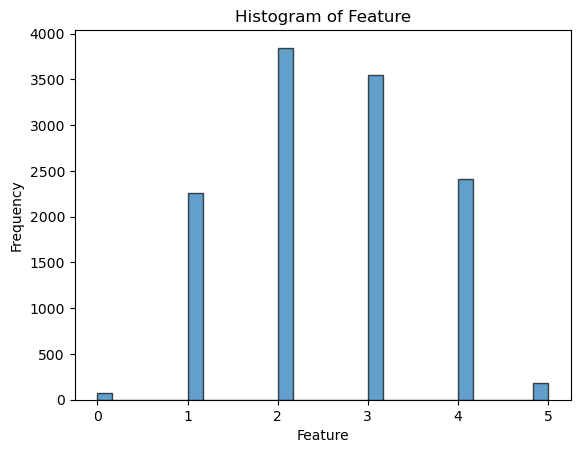

In [58]:
plt.hist(unprocessed['Bedrooms'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


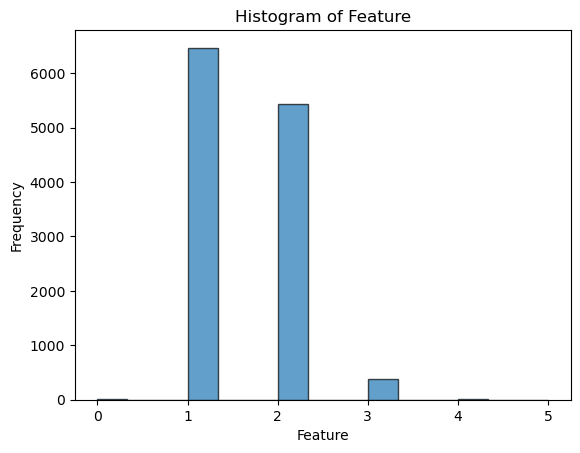

In [59]:
plt.hist(unprocessed['Bathrooms'], bins=15, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

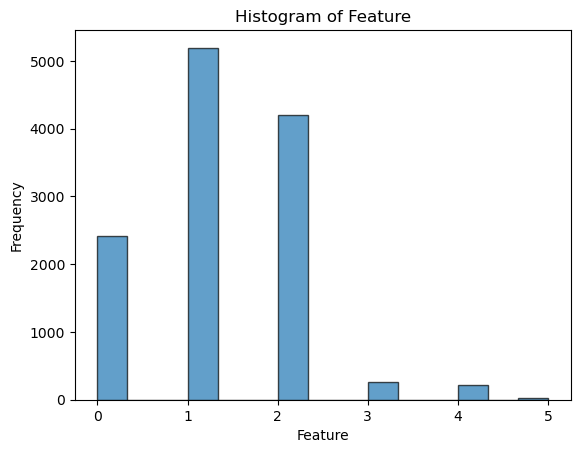

In [60]:
plt.hist(unprocessed['Parking'], bins=15, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


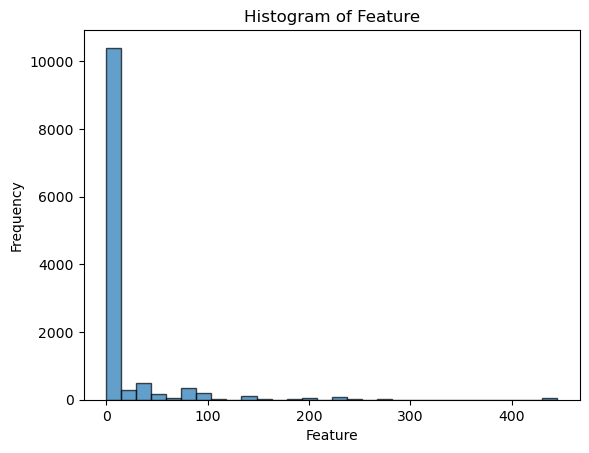

In [61]:
plt.hist(unprocessed['Distance_to_Nearest_Station_km'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


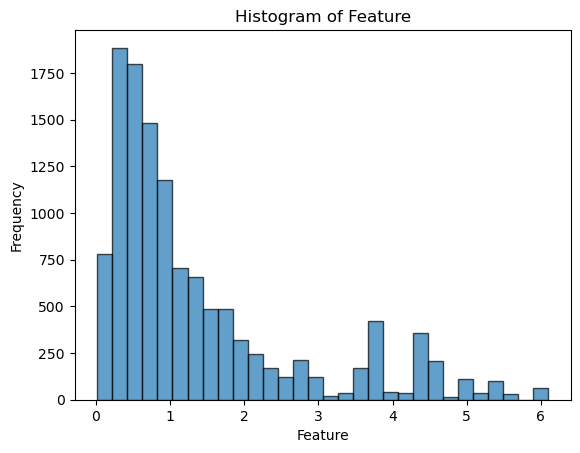

In [62]:
unprocessed['Distance_to_Nearest_Station_log'] = np.log1p(unprocessed['Distance_to_Nearest_Station_km']) 
plt.hist(unprocessed['Distance_to_Nearest_Station_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


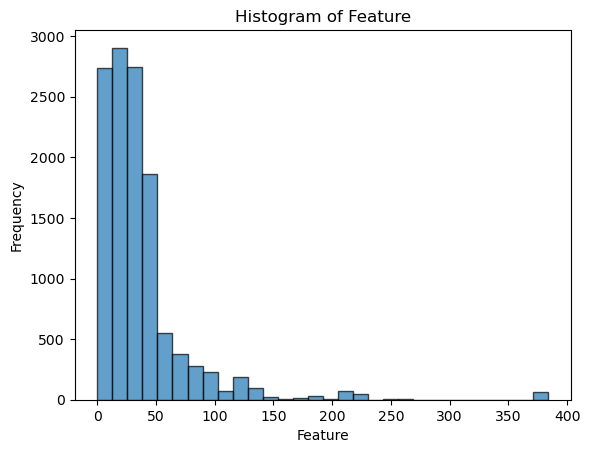

In [63]:
plt.hist(unprocessed['Durations to CBD'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


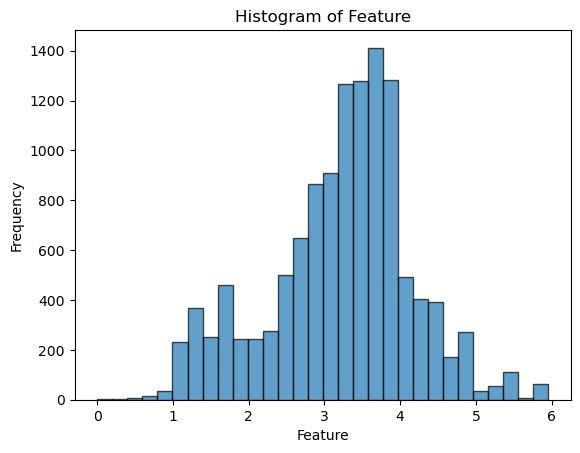

In [64]:
unprocessed['CBDDurations_log'] = np.log1p(unprocessed['Durations to CBD']) 
plt.hist(unprocessed['CBDDurations_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


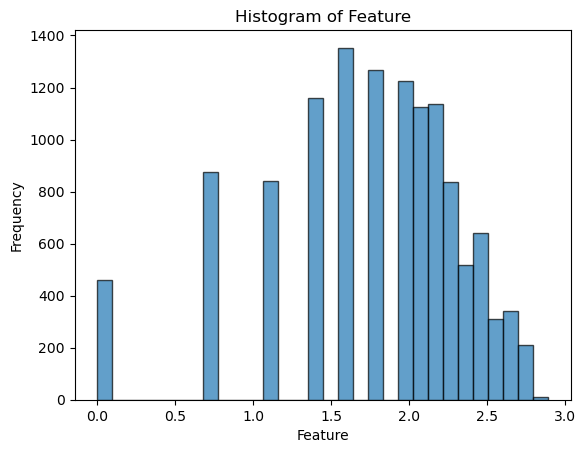

In [65]:
unprocessed['School_Counts_log'] = np.log1p(unprocessed['School_Counts'])
plt.hist(unprocessed['School_Counts_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


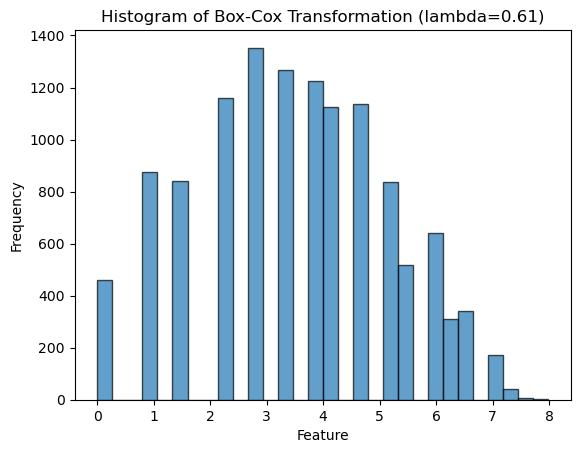

In [66]:
# Apply Box-Cox transformation (add 1 to handle zero values)
school_counts_positive = unprocessed['School_Counts'] + 1
unprocessed['School_Counts_boxcox'], lambda_ = boxcox(school_counts_positive)

plt.hist(unprocessed['School_Counts_boxcox'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title(f'Histogram of Box-Cox Transformation (lambda={lambda_:.2f})')
plt.show()


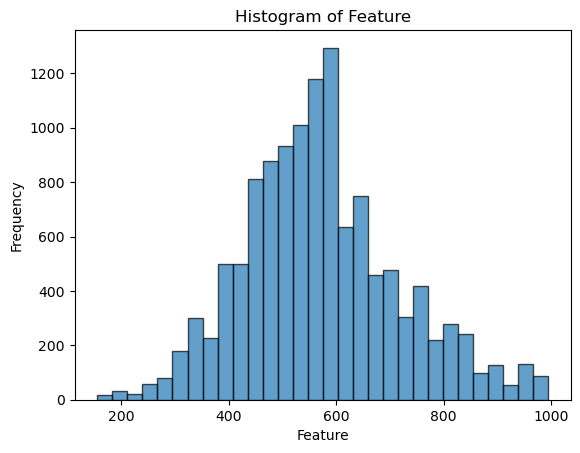

In [67]:

plt.hist(unprocessed['Rent_Price'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


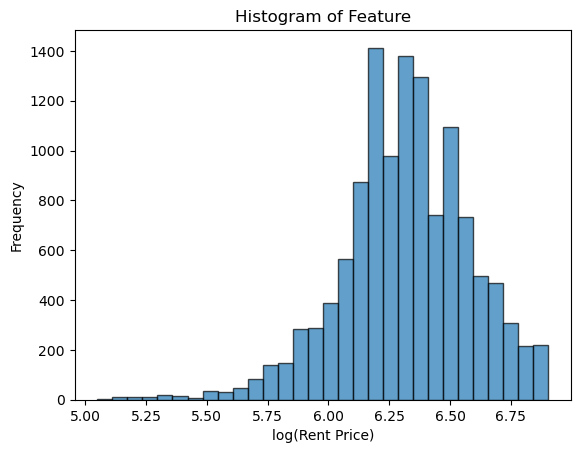

In [68]:
unprocessed["Rent_Price_log"] = np.log1p(unprocessed["Rent_Price"])
plt.hist(unprocessed['Rent_Price_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('log(Rent Price)')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

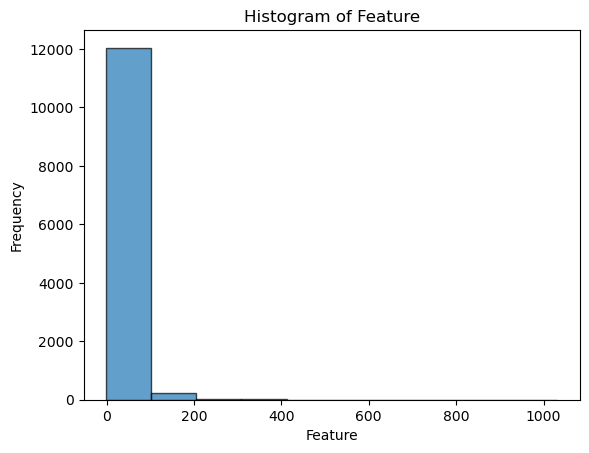

In [69]:
plt.hist(unprocessed['Days_From_Now'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


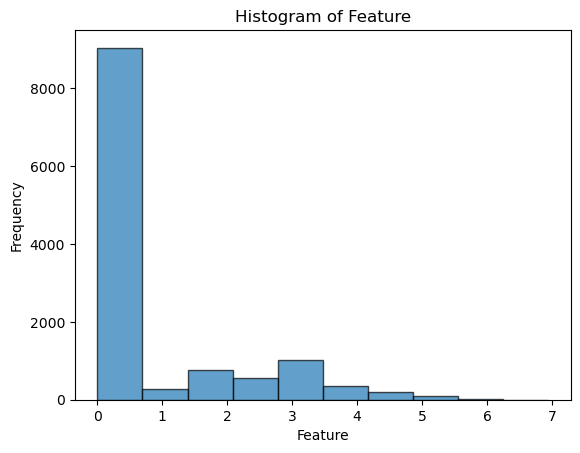

In [70]:
unprocessed["Days_From_Now"] = unprocessed["Days_From_Now"].apply(lambda x: 0 if x < 0 else x)
unprocessed["Days_From_Now"].unique()

plt.hist(np.log1p(unprocessed['Days_From_Now']), bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()
unprocessed['Days_From_Now'] = np.log1p(unprocessed['Days_From_Now'])

In [71]:
unprocessed = unprocessed.drop(["Street"], axis = 1)
unprocessed = unprocessed[['Rent_Price_log', 'Bedrooms', 'Bathrooms', 'Parking', 'Property_Type',
        'Suburb', 'Postcode', 'Distance_to_Nearest_Station_log', 'CBDDurations_log',
        'Sentiment',  "Feature_Count", "Bond",
       'Dominant_Topic_Label', 'negative_class',
       'positive_class', 'School_Counts_boxcox', "Property_Size",  "Date_Available",
        'Built in wardrobes', 'Dishwasher', 'Air conditioning', 'Floorboards',
       'Secure Parking', 'Intercom', 'Heating', 'Ensuite', 'Balcony / Deck',
       'Fully fenced', 'Days_From_Now']]
unprocessed.isnull().sum()

Rent_Price_log                       0
Bedrooms                             0
Bathrooms                            0
Parking                              0
Property_Type                        0
Suburb                               1
Postcode                             1
Distance_to_Nearest_Station_log      0
CBDDurations_log                     0
Sentiment                            0
Feature_Count                        0
Bond                               923
Dominant_Topic_Label                 0
negative_class                       0
positive_class                       0
School_Counts_boxcox                 0
Property_Size                        0
Date_Available                       0
Built in wardrobes                   0
Dishwasher                           0
Air conditioning                     0
Floorboards                          0
Secure Parking                       0
Intercom                             0
Heating                              0
Ensuite                  

                                 Bedrooms  Bathrooms  CBDDurations_log  \
Bedrooms                         1.000000   0.623817          0.509448   
Bathrooms                        0.623817   1.000000          0.254815   
CBDDurations_log                 0.509448   0.254815          1.000000   
Parking                          0.649193   0.431414          0.498239   
negative_class                  -0.056174  -0.035496          0.003356   
positive_class                   0.058633   0.036571         -0.002264   
Sentiment                        0.150898   0.108613          0.010527   
School_Counts_boxcox            -0.537142  -0.382672         -0.623908   
Distance_to_Nearest_Station_log  0.362813   0.176095          0.745023   
Bond                             0.070074   0.095409         -0.065761   
Property_Size                    0.042388   0.032238          0.030974   
Feature_Count                   -0.020665   0.079664         -0.138510   
Rent_Price_log                   0.362

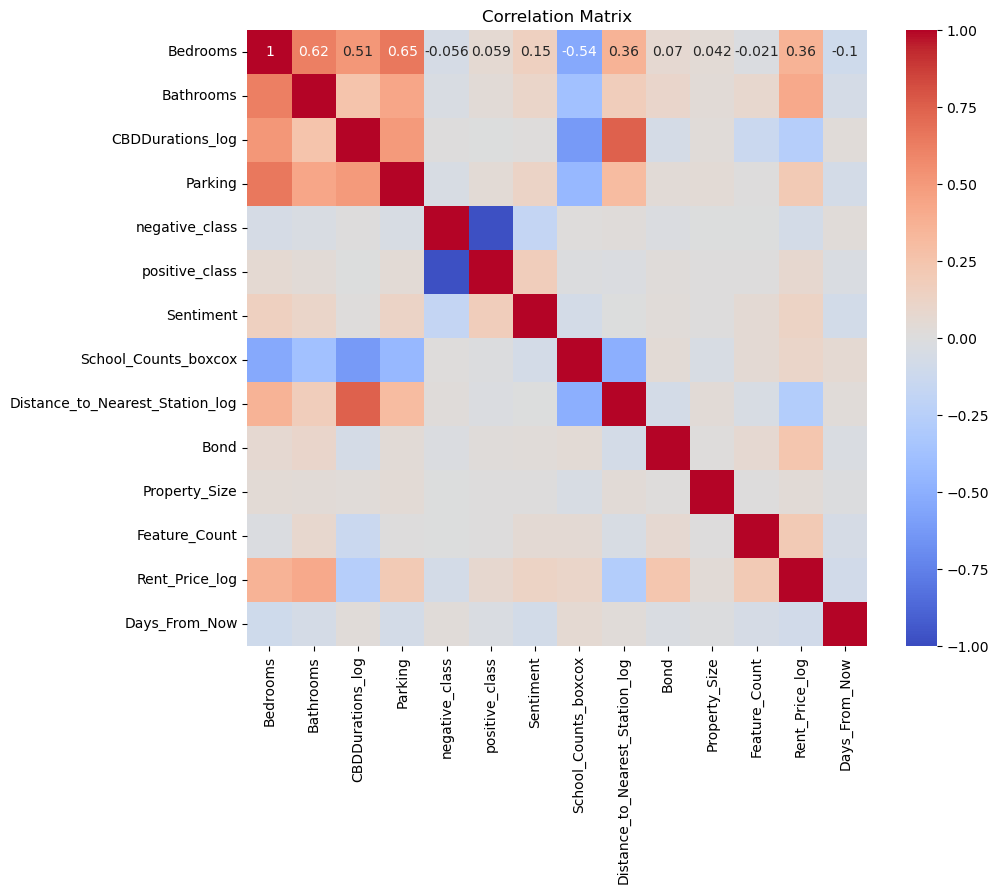

In [72]:
correlation_matrix = unprocessed[['Bedrooms', 'Bathrooms', 'CBDDurations_log', 
                                'Parking','negative_class', 'positive_class',
                                'Sentiment','School_Counts_boxcox', 
                                'Distance_to_Nearest_Station_log', 'Bond', 
                                "Property_Size","Feature_Count", 'Rent_Price_log', "Days_From_Now"]].corr()

print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


### Normalisation & Encoding

In [73]:
processed = unprocessed.copy()
numerical_features =['Bedrooms', 'Bathrooms', 'CBDDurations_log', 
                    'Parking','negative_class', 'positive_class',
                    'Sentiment','School_Counts_boxcox', 
                    'Distance_to_Nearest_Station_log', 'Bond', 
                    "Property_Size","Feature_Count", 'Days_From_Now']
categorical_features = ['Property_Type', 'Suburb', 'Postcode', 'Dominant_Topic', 'Sentiment', "Date_Available",
               'Built in wardrobes', 'Dishwasher', 'Air conditioning', 'Floorboards',
                'Secure Parking', 'Intercom', 'Heating', 'Ensuite', 'Balcony / Deck',
                'Fully fenced']

In [74]:
X = processed.drop(["Rent_Price_log"], axis = 1)
y = processed['Rent_Price_log']
print(X.isnull().sum())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

Bedrooms                             0
Bathrooms                            0
Parking                              0
Property_Type                        0
Suburb                               1
Postcode                             1
Distance_to_Nearest_Station_log      0
CBDDurations_log                     0
Sentiment                            0
Feature_Count                        0
Bond                               923
Dominant_Topic_Label                 0
negative_class                       0
positive_class                       0
School_Counts_boxcox                 0
Property_Size                        0
Date_Available                       0
Built in wardrobes                   0
Dishwasher                           0
Air conditioning                     0
Floorboards                          0
Secure Parking                       0
Intercom                             0
Heating                              0
Ensuite                              0
Balcony / Deck           

In [75]:
categorical_encoding = ['Property_Type', 'Suburb', 'Postcode', 'Dominant_Topic_Label']
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
onehot_encoder.fit(X_train[categorical_encoding])

X_train_encoded = onehot_encoder.transform(X_train[categorical_encoding])
X_test_encoded = onehot_encoder.transform(X_test[categorical_encoding])

encoded_columns = onehot_encoder.get_feature_names_out(categorical_encoding)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=categorical_encoding), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_encoding), X_test_encoded_df], axis=1)


X_train['Date_Available'] = X_train['Date_Available'].map({'Available Now': 1, 'Later': 0})
X_test['Date_Available'] = X_test['Date_Available'].map({'Available Now': 1, 'Later': 0})

print(X_train.head())
print(X_test.head())


       Bedrooms  Bathrooms  Parking  Distance_to_Nearest_Station_log  \
11370         3          1        3                         0.590573   
6198          3          1        2                         0.790785   
8547          4          2        1                         2.052429   
4490          4          1        2                         0.688132   
11114         2          1        1                         5.244562   

       CBDDurations_log  Sentiment  Feature_Count    Bond  negative_class  \
11370          3.519054   0.666667              5  2281.0             0.0   
6198           3.240141   0.456667              0  1993.0             0.0   
8547           3.661303   0.412500              0  2237.0             0.0   
4490           2.885741   0.408636              0  3911.0             0.0   
11114          5.383986   0.200000              2  1400.0             1.0   

       positive_class  ...  Postcode_3936.0  Postcode_3938.0  Postcode_3976.0  \
11370             1.0  

/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [76]:
imputer = KNNImputer(n_neighbors=3)

X_train[['Bond']] = imputer.fit_transform(X_train[['Bond']])
X_test[['Bond']] = imputer.transform(X_test[['Bond']])

In [77]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])


X_train_scaled = scaler.transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)


In [78]:
X_train = X_train.drop(columns=numerical_features)
X_test = X_test.drop(columns=numerical_features)

X_train = pd.concat([X_train, X_train_scaled_df], axis=1)
X_test = pd.concat([X_test, X_test_scaled_df], axis=1)

print(X_train.head())
print(X_test.head())


       Date_Available  Built in wardrobes  Dishwasher  Air conditioning  \
11370               1                   1           0                 0   
6198                0                   0           0                 0   
8547                1                   0           0                 0   
4490                0                   0           0                 0   
11114               1                   0           0                 0   

       Floorboards  Secure Parking  Intercom  Heating  Ensuite  \
11370            0               0         0        1        0   
6198             0               0         0        0        0   
8547             0               0         0        0        0   
4490             0               0         0        0        0   
11114            0               0         0        0        0   

       Balcony / Deck  ...   Parking  negative_class  positive_class  \
11370               0  ...  2.018169       -0.245902        0.249861   
6198    

In [79]:
mi_scores = mutual_info_regression(X_train, y_train)
mi_scores_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})

features = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(features.head(30))

top_features = features['Feature'].iloc[:30].values
top_features

mi_scores_df.to_csv("../data/historical/important.csv")

                                               Feature  MI Score
773                                               Bond  3.661661
772                    Distance_to_Nearest_Station_log  0.239927
766                                   CBDDurations_log  0.221851
764                                           Bedrooms  0.159343
765                                          Bathrooms  0.123613
774                                      Property_Size  0.089271
767                                            Parking  0.074538
770                                          Sentiment  0.066695
771                               School_Counts_boxcox  0.063696
776                                      Days_From_Now  0.048663
2                                           Dishwasher  0.041932
775                                      Feature_Count  0.041701
13                                 Property_Type_House  0.033720
17                                Property_Type_Studio  0.033042
761  Dominant_Topic_Label

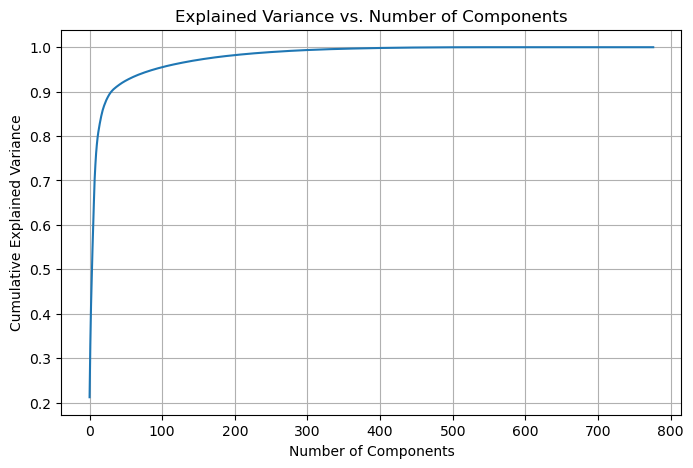

In [80]:

pca_full = PCA()
pca_full.fit(X_train)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()


In [81]:
target_variance = 0.95
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= target_variance) + 1

print(f"Number of components to retain 95% of variance: {n_components_95}")

pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca_train = pd.DataFrame(X_train_pca)
pca_test = pd.DataFrame(X_test_pca)

Number of components to retain 95% of variance: 90


In [82]:
print(X_train.isnull().sum().sum())  # Should be 0
print(X_test.isnull().sum().sum())   # Should be 0

0
0


In [83]:
mi_scores = mutual_info_regression(pca_train, y_train)
mi_scores_df = pd.DataFrame({'Feature': pca_train.columns, 'MI Score': mi_scores})

feature_ranking = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(feature_ranking.head(30))

top_features = feature_ranking['Feature'].iloc[:30].values
pca_train_top = pca_train[top_features]
pca_test_top = pca_test[top_features]

input_train = pca_train[top_features]
input_test = pca_test[top_features]

    Feature  MI Score
4         4  0.217032
2         2  0.184558
1         1  0.146247
42       42  0.133572
52       52  0.126811
47       47  0.124259
35       35  0.123498
56       56  0.121654
38       38  0.118501
37       37  0.114746
36       36  0.112368
44       44  0.106450
45       45  0.104969
40       40  0.103430
32       32  0.102988
0         0  0.101158
48       48  0.098506
33       33  0.097500
28       28  0.095120
68       68  0.094842
59       59  0.094326
43       43  0.092990
62       62  0.092884
31       31  0.092014
77       77  0.091932
39       39  0.088958
25       25  0.088925
58       58  0.087779
41       41  0.085826
23       23  0.085554


In [84]:
pca_train.to_csv("../data/input/X_train.csv", index = False)
pca_test.to_csv("../data/input/X_test.csv", index = False)
y_train.to_csv("../data/input/y_train.csv", index = False)
y_test.to_csv("../data/input/y_test.csv", index = False)